In [79]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [80]:
import numpy as np
import pandas as pd

In [81]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_, func

In [83]:
#connect to SQLite file

engine = create_engine("sqlite:///hawaii.sqlite")


In [84]:
## inspect engines and get table names

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [85]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [86]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [87]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [88]:

# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

In [89]:
# We can view all of the classes that automap found
# put data in dictionary to have a peek at each of their first row 

first_row_Station = session.query(Station).first().__dict__
first_row_Station

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fac31ec0a90>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [90]:
first_row_Measurement = session.query(Measurement).first().__dict__
first_row_Measurement

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fac31ec0ac0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01'}

# Exploratory Climate Analysis

In [91]:


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [92]:
Measurement_list = [Measurement.station, Measurement.id, Measurement.date, Measurement.prcp]


In [93]:
# get the last data from the database to determine the last 12 months of precipitation data
engine.execute('SELECT * FROM measurement order by date').fetchall()[-1]

(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)

In [109]:
prvyeardate = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
prvyeardate

datetime.date(2016, 8, 23)

In [112]:
## Design a query to retrieve the last 12 months of precipitation data 
#get data from the past 12 months of the last data entry
try_last12 = session.query(Measurement.station, Measurement.id, Measurement.date, Measurement.prcp ).\
    filter((Measurement.date) >= prvyeardate)
try_last12

In [118]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
prcplast12_df = pd.DataFrame(try_last12, columns=['station', 'id', 'date', 'prcp'])
prcplast12_df.set_index('date', inplace=True)
prcplast12_df.sort_values(by=['date'], inplace=True)                             
prcplast12_df

,station,id,prcp
date,,,
2016-08-23,USC00519397,2364,0.00
2016-08-23,USC00517948,8825,NaN
2016-08-23,USC00519281,14608,1.79
2016-08-23,USC00514830,7331,0.05
2016-08-23,USC00513117,5091,0.15
...,...,...,...
2017-08-22,USC00519523,12186,0.00
2017-08-23,USC00514830,7635,0.00
2017-08-23,USC00519397,2724,0.00


In [120]:
#Display Summary Statistic for the last 12 months Precipitation

prcplast12_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [121]:

prcplast12_df = pd.DataFrame(prcp_last12, columns=['station', 'id', 'date', 'prcp'])


In [122]:
## confirming that all the stations in the list are in oahu
prcplast12_df['station'].unique()

array(['USC00519397', 'USC00513117', 'USC00514830'], dtype=object)

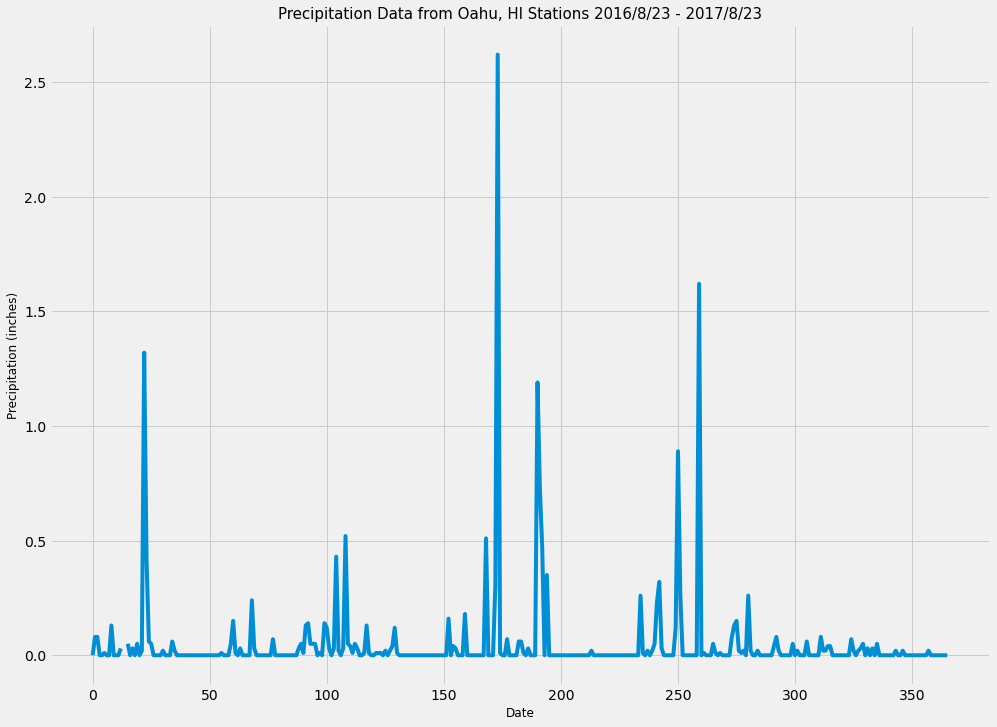

In [123]:
# and plot the results
prcplast12_df['prcp'].plot.line()
plt.tight_layout()
plt.gcf().set_size_inches(15, 11)
plt.ylabel("Precipitation (inches)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title('Precipitation Data from Oahu, HI Stations 2016/8/23 - 2017/8/23', fontsize=15)
plt.show()

In [124]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [125]:
# What are the most active stations? (i.e. what stations have the most rows)?

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()[0]  

('USC00519281', 2772)

In [126]:
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [127]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [128]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station


tobs_last12 = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(and_(func.strftime(Measurement.date) >= "2016-08-23"),\
               func.date(Measurement.date) <= "2017-08-23",\
                Measurement.station == "USC00519281").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
tobs_last12

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [129]:
#convert query for the last 12 mo tobs into DF
tobslast12_df = pd.DataFrame(tobs_last12, columns=['station', 'date', 'tobs'])
tobslast12_df.sort_values(by=['date'], inplace=True)
tobslast12_df

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
...,...,...,...
347,USC00519281,2017-08-14,77.0
348,USC00519281,2017-08-15,77.0
349,USC00519281,2017-08-16,76.0
350,USC00519281,2017-08-17,76.0


In [130]:
## confirming that values in tobs column are within the expected range
tobslast12_df['tobs'].unique()

array([77., 80., 75., 73., 78., 74., 79., 76., 72., 71., 63., 70., 68.,
       67., 69., 66., 65., 62., 64., 59., 60., 61., 81., 82., 83.])

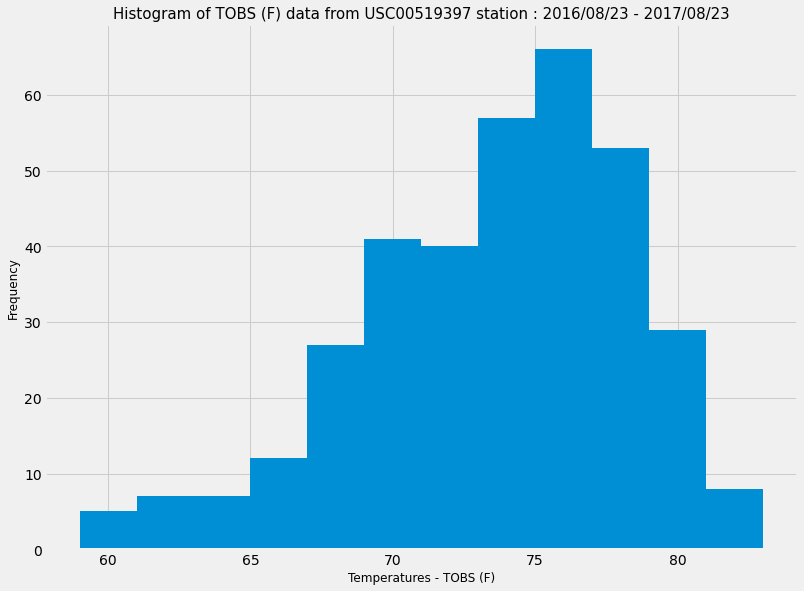

In [131]:
#plot the tobs df as a histogram
plt.hist(tobslast12_df["tobs"], bins=12)
plt.gcf().set_size_inches(12, 9)
plt.xlabel("Temperatures - TOBS (F)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title('Histogram of TOBS (F) data from USC00519397 station : 2016/08/23 - 2017/08/23', fontsize=15)
plt.show()

## Bonus Challenge Assignment

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [40]:
# Plot the daily normals as an area plot with `stacked=False`
